In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.ar_model import  AutoReg

In [2]:
df=pd.read_csv('Neonatal_amh.csv',index_col=0,parse_dates=True)

In [3]:
x=df.values

In [4]:
df.head()

,Neonatal_amh
year,
1977-01-01,65.919610
1978-01-01,66.014650
1979-01-01,66.124649
1980-01-01,66.145783
1981-01-01,65.993979


<Axes: xlabel='year'>

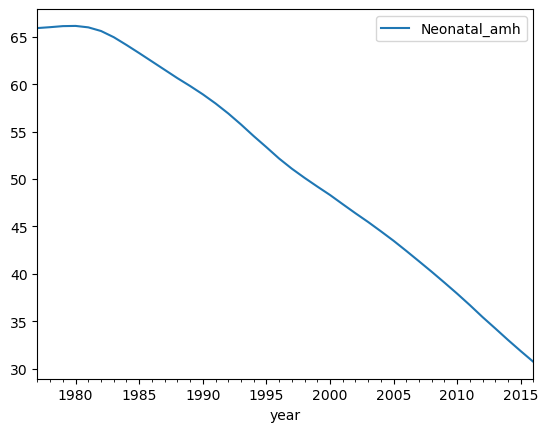

In [5]:
df.plot()

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
dftest=adfuller(df['Neonatal_amh'], autolag='AIC')

In [8]:
print(" 1: ADF: ", dftest[0])
print(" 2: P-value ", dftest[1])
print(" 3: number of lag: ", dftest[2])

 1: ADF:  1.5848684399015132
 2: P-value  0.997811462217695
 3: number of lag:  3


In [9]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

/Users/kasahunabdisa/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


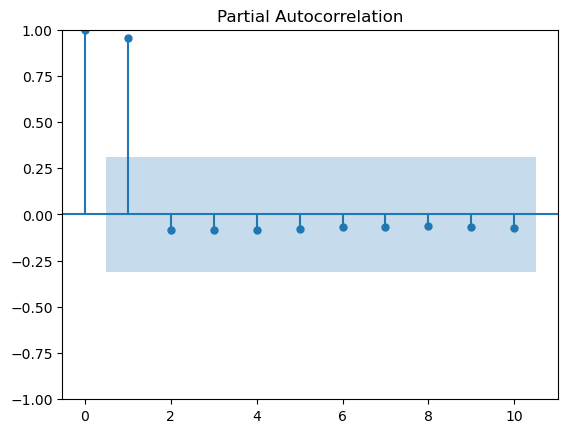

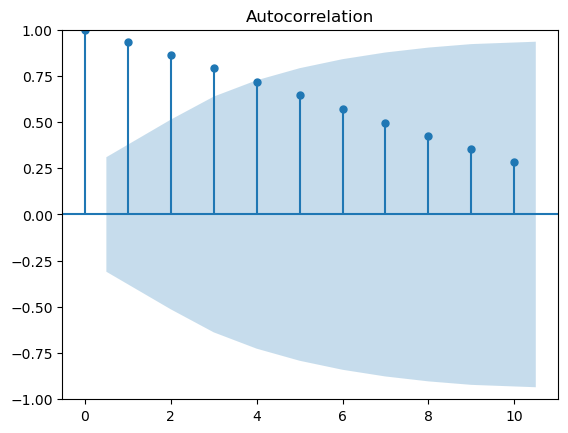

In [11]:
pacf=plot_pacf(df['Neonatal_amh'], lags=10)
acf=plot_acf(df['Neonatal_amh'], lags=10)

In [12]:
xtrain=x[:len(x)-3]
xtest=x[len(x)-3:]

In [13]:
model=AutoReg(xtrain,lags=3).fit()

In [14]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   37
Model:                     AutoReg(3)   Log Likelihood                  54.335
Method:               Conditional MLE   S.D. of innovations              0.049
Date:                Sat, 23 Sep 2023   AIC                            -98.671
Time:                        19:57:42   BIC                            -91.039
Sample:                             3   HQIC                           -96.068
                                   37                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2333      0.089     -2.631      0.009      -0.407      -0.059
y.L1           2.3842      0.117     20.300      0.000       2.154       2.614
y.L2          -1.9201      0.224     -8.581      0.0

In [15]:
pred=model.predict(start=len(xtrain),end=len(x)-1,dynamic=False)

[33.07838294 31.93252492 30.785234  ]


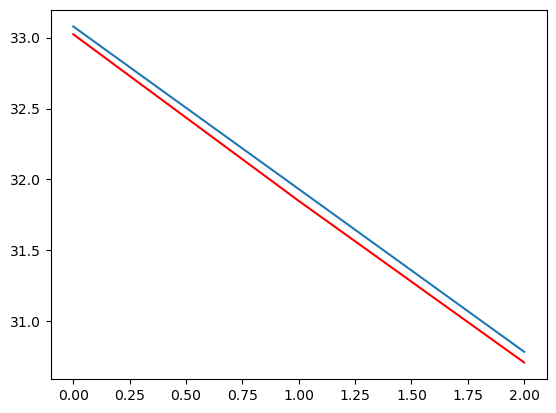

In [16]:
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(xtest, color='red')
print(pred)

In [17]:
#error calculation
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(xtest,pred))
print(rmse)

0.07221303807678837


In [18]:
#making future predictions
pred_future=model.predict(start=len(x)+1, end=len(x)+9, dynamic=False)

In [19]:
print("Predict the next Nine year(up to 2025)  Neonatal mortality  trend for Amhara Region")
print(pred_future)
print("Number of predictions made :\t:", len(pred_future))

Predict the next Nine year(up to 2025)  Neonatal mortality  trend for Amhara Region
[28.45102871 27.25682274 26.04396612 24.81360869 23.56727173 22.30641745
 21.03222878 19.74553606 18.44683337]
Number of predictions made :	: 9
